In [36]:
import pandas as pd
# load the bank transaction dataset
df = pd.read_csv('POS_TRANS_v1.csv')
print(df.info())

print("\nInformation about the dataset and print the first 10 transactions")
print("-----------------------------------------------------------------")
print(df.head(10)) # print the first 10 transactions

print("\nInformation about unique values in product_name")
print("-----------------------------------------------------------------")
print(df['Product_Name'].unique())

print("\nkey statistics about product_name")
print("-----------------------------------------------------------------")
print(df['Product_Name'].describe())

print("\nnumber of occurences for each unique value in product_name")
print("-----------------------------------------------------------------")
print(df['Product_Name'].value_counts())

print("\nInformation about unique values in transaction date")
print("-----------------------------------------------------------------")
print(df['Transaction_Date'].unique())

#print("\nGenerating association rules from items purchased by each account holder")
#print("--------------------------------------------------------------------------")
# Generating association rules, we need to group our accounts
#transactions = df.groupby(['Transaction_Id'])['Product_Name'].apply(list)
#print(transactions.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459258 entries, 0 to 459257
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Location          459258 non-null  int64  
 1   Transaction_Id    459256 non-null  float64
 2   Transaction_Date  459258 non-null  object 
 3   Product_Name      459258 non-null  object 
 4   Quantity          459256 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 17.5+ MB
None

Information about the dataset and print the first 10 transactions
-----------------------------------------------------------------
   Location  Transaction_Id Transaction_Date Product_Name  Quantity
0         2         12359.0       12/23/2018      Yoghurt       1.0
1         9         12362.0       12/23/2018          Jam       NaN
2         9         12362.0       12/23/2018          Jam       1.0
3         5         12365.0       12/23/2018      Shampoo       1.0
4         2  

# Association mining (Market basket analysis)
    -identifying patterns in the relationship of different attributes (finding patterns in transactional data)
    - transactional data: two types of mining, predictive(need a target attribute, independent and dependent   attributes) and descriptive (don´t have independent attribute)
    - association mining doesn´t have a response attribute (that it is the difference of the dataset we have been using in the past). we have an option to identify what the person will buy with, f.eks a banana. 
    - marketing people can use this for, getting customers buy more (by placing items closer and far away from eachother), data collection. And also to target their customers better, to improve customer service, but also improve the company´s revenue
    - tries to find the rule that govern how or why such products/items are often bought together. For examples, peanut butter and jelly are frequently purchased together beacuse a lot of people like to make PB&J sandwiches
    - Market basket analysis = aim is to discover associations of items occuring together more often than you´d expect from randomly sampling all the possibilities. 
 
 Support, lift and confidence
 
- Support = support of an item set X is the proportion of transaction in the database in which the item X appears. It signifies the popularity of an item set. 
- So support of X equals numbers of transactions in which X appears / total number of transactions
- How frequently the if/then relationshio appears in the databse

- Confidence = signifies the likelihood of an item Y being purchased when item X is purchased
- conf(X -> Y) = supp(X-Y) / supp(X)
- confidence tells about the number of times these relationships have been found to be true

- Lift = signifies the likelihood of an item (Y) being purchased when item (X) is being purchased, while taken into account the popularity of (Y)
- lift(X->Y) = supp(X-Y) / supp(X) * supp(Y)
         

In [37]:
# Preprocessing

def preprocess_association():
    #df.dropna(subset=['Transaction_Id', 'Quantity'], inplace=True) # handling missing values - drop empty rows
    df['Transaction_Id'] = df['Transaction_Id'].fillna(0).astype(int)  # Fill missing values with 0 and convert to int
    df['Quantity'] = df['Quantity'].fillna(0)  # Fill missing values with 0
    df.drop(['Transaction_Date', 'Location'], axis=1, inplace=True) # drop unecessary columns
    one_hot = pd.get_dummies(df, columns=['Product_Name']) # one-hot encoding

    # Reseting the index after removing rows with missing values
    df.reset_index(drop=True, inplace=True)

preprocess_association()

df.info()

#  group the transactions by 'Transaction_Id' and create
#a Series where each entry is a list of products purchased in a single transaction.
print("\nGenerating association rules from items purchased by each account holder")
print("--------------------------------------------------------------------------")
# Generating association rules, we need to group our accounts
transactions = df.groupby(['Transaction_Id'])['Product_Name'].apply(list)
print(transactions.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459258 entries, 0 to 459257
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction_Id  459258 non-null  int64  
 1   Product_Name    459258 non-null  object 
 2   Quantity        459258 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.5+ MB

Generating association rules from items purchased by each account holder
--------------------------------------------------------------------------
Transaction_Id
0                       [Shampoo, Butter]
12359                           [Yoghurt]
12362                          [Jam, Jam]
12365                           [Shampoo]
12371                             [Bread]
12380                               [Egg]
12383                          [Jam, Jam]
12386                          [Jam, Jam]
12392                         [Milk, Tea]
12401    [Yoghurt, Yoghurt, Cordial, Tea]
Name: Product

# ASSESSMENT TASK 2: ASSOCIATION ANALYSIS

1) **Identify data quality issues in “POS_TRANS_v1.csv” file such as unusual data types, missing values and others. Describe your data cleaning approach and clean the dataset.**
   - **Missing values:**
    1   Transaction_Id    459256 non-null  float64
    4   Quantity          459256 non-null  float64
       - what to do with these? Remove the rows that has missing values or NaN. There is no need for dropping these columns since there are only two missing values in each columns. 
   - **unusal data types:**
   It seems that all the datatypes assigned to the columns are appropiate. But should do more research around this
   Product_name is an object, maybe we do one-hot encoding on it? So that we can use it when working with numerical attributes. 
   
   - **Exploration**
   1.**Transaction date:** When exploring more on the dataset, I would like to consider to drop the transaction date column. Not sure how much insight or benefit we would get from it, when performing the association analysis. We can see that the year the product was bought is the same (2018). While the months are slightly different, for example 12 (December) occurs 6 times, while 3 (march) occur only once. But all are the same year. 
   2. **Location:** Consider dropping this too. 

2) **What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.**

1. **Transaction_ID**:
   - Role: Identifier for each transaction. It represents a unique transaction identification number for a given sale. Multiple products can be associated with the same Transaction_ID.
   - Measurement Level: Nominal or Categorical. Transaction_ID is a unique identifier for each transaction, and it doesn't have a meaningful order or numerical value.

2. **Product_Name**:
   - Role: The product that was purchased in each transaction. It represents the items or products that customers buy.
   - Measurement Level: Nominal or Categorical. Product_Name is a categorical variable representing different products, and there is no inherent order or ranking among these products.

3. **Quantity**:
   - Role: The quantity of the product purchased in each transaction. It indicates how many of each product were bought, but in your preprocessing, you set it to a constant value of 1 for each item.
   - Measurement Level: Discrete or Ratio. If Quantity is not set to a constant value (e.g., 1 for all items), it would be a discrete numerical variable. However, in your analysis, it's effectively treated as a binary variable, where 1 indicates the presence of the product in the transaction.

I chose these variables to perform association analysis based on the purchase history of customers. The Transaction_ID identifies individual transactions, and Product_Name is the item of interest. The Quantity variable could be used for more advanced analyses, such as quantitative association analysis, but I treated it as binary (presence/absence) for the current analysis, which is common in market basket analysis.

My choices for these variables and their measurement levels are justified because they are appropriate for association rule mining, where the focus is on discovering relationships between items/products purchased together. The nominal measurement level for Transaction_ID and Product_Name is suitable for categorical data, and the effective binary encoding of Quantity is also acceptable for this type of analysis.

There are more relevant for performing an association analysis

3) **Conduct association mining and answer the followings:**

    a) What is the highest lift value for the resulting rules? Which rule has this value? 
        
        Lift is a measure of the strength of association between items.
        The highest lift value is 1.0 for the rule:
        Items:  => Bread
        --------------------------------------------------------------------------------
   b) What is the highest confidence value for the resulting rules? Which rule has this value?
 
        Confidence is a measure of how often a rule is true
        The highest confidence value is 0.24130620653103266 for the rule:
        Items:  => Tea
4) **Plot the confidence, lift, and support of the resulting rules. Interpret them to discuss the rule set obtained.**

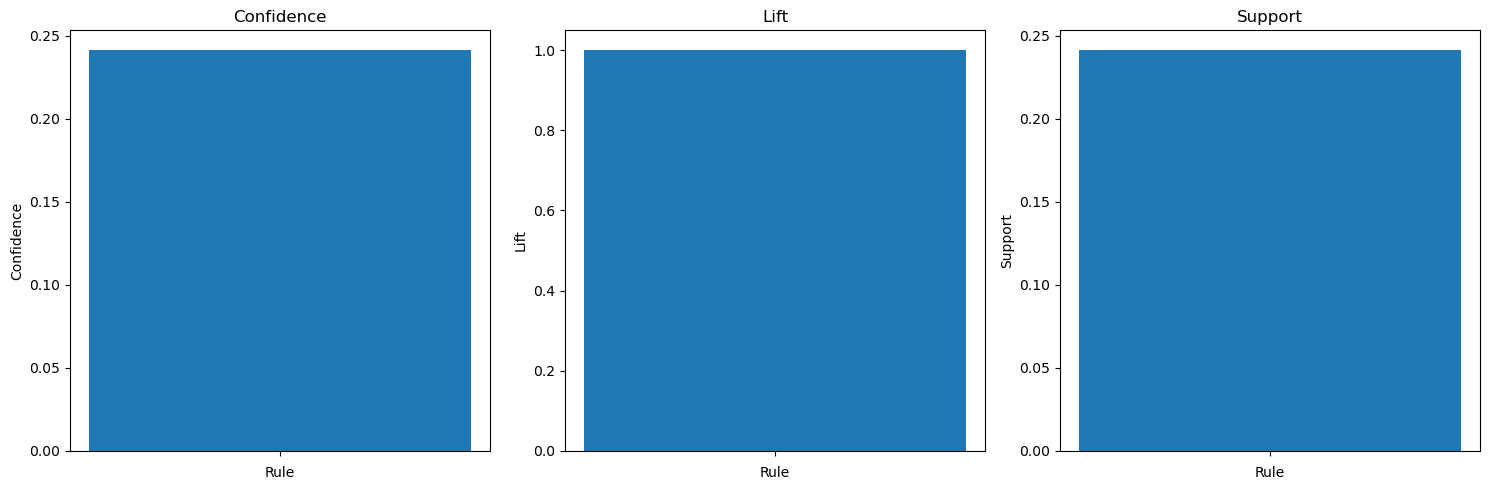

**Interpretation:**

**Confidence:** This plot shows the confidence of the association rules. High confidence indicates that the rule is often true. You can see which rules have the highest confidence, meaning that the right-side item is frequently bought when the left-side item is bought.

**Lift:** The lift plot represents the strength of association between items. A lift greater than 1 suggests a positive association, and less than 1 suggests a negative association. High lift values indicate strong associations between items, which can help in cross-selling.

**Support:** Support shows how frequently a rule is applicable. High support values indicate that the rule is valid for a substantial portion of the transactions.

----------------------------------------------------------------------------------------------------

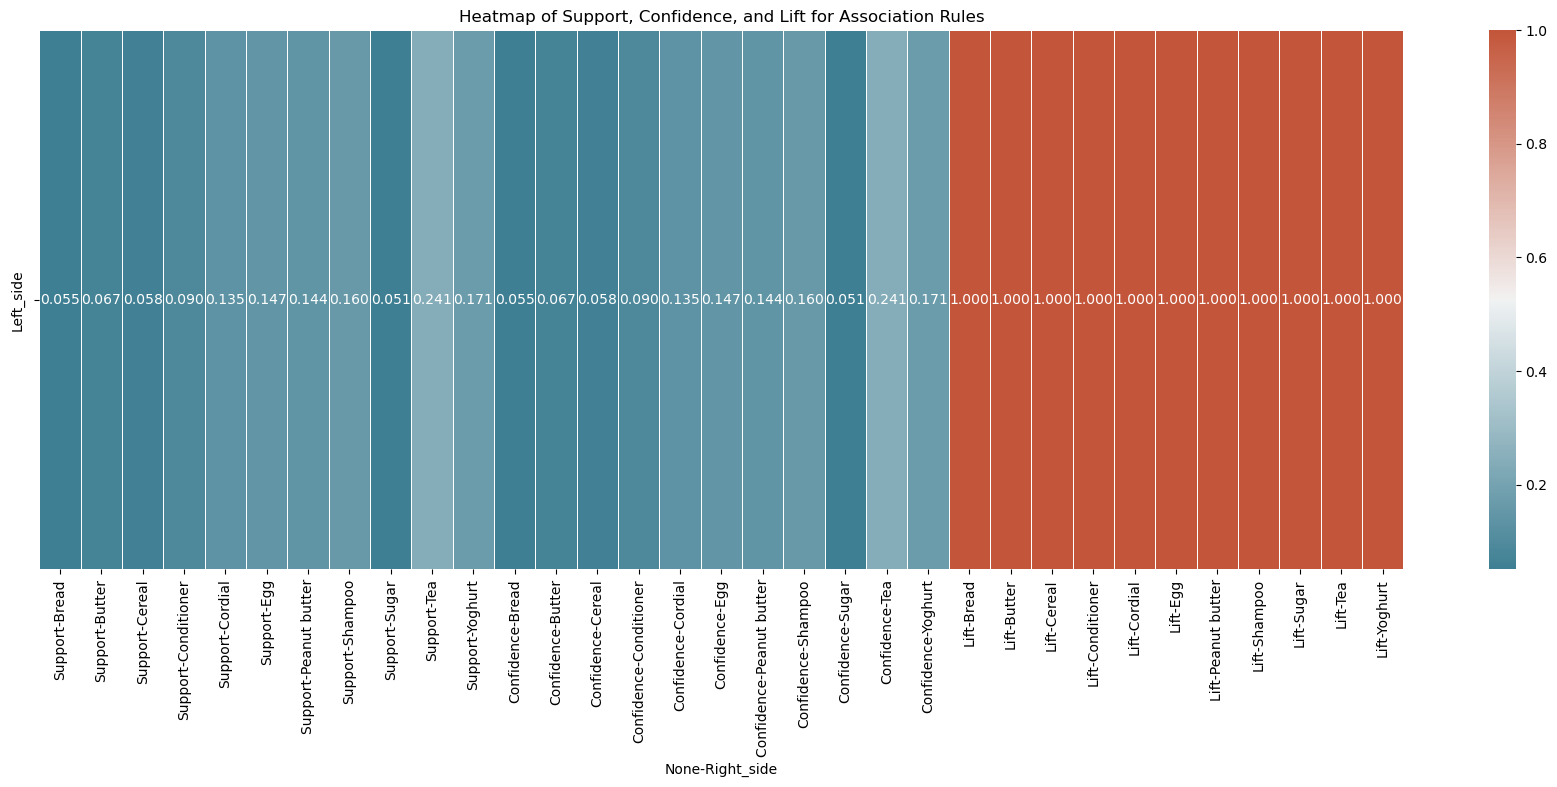

**Interpretation:**

Rows represent the left-side items in the association rules. Columns represent the right-side items in the association rules. The heatmap cells show the values of Support, Confidence, and Lift for each combination of left-side and right-side items. This heatmap allows you to quickly identify the strength of association (Confidence and Lift) and the frequency of occurrence (Support) for different rules. You can visually spot the strongest rules by looking at cells with high values in the heatmap.

3) **The store is particularly interested in products that individuals purchase when they buy “Tea”.**

a) How many rules are in the subset?

b) Based on the rules, what are the other products these individuals are most
likely to purchase?

In [39]:
from apyori import apriori

#preprocess_association()

# generate association rules
transaction_list = list(transactions)
# applying apriori algorithm - accepts a number of parameters
results = list(apriori (transaction_list, min_support=0.05))
print(results[:5]) # print first 5 rules
print("\n.........................................................................\n")

# to print the above result more neatly, we can make a function for it
def convert_apriori_results_to_pandas_df(results):
    rules = []
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = rifht side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift])
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support',
                                       'Confidence', 'Lift'])

result_df = convert_apriori_results_to_pandas_df(results)
print(result_df.head(20))

[RelationRecord(items=frozenset({'Bread'}), support=0.05464527322636613, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Bread'}), confidence=0.05464527322636613, lift=1.0)]), RelationRecord(items=frozenset({'Butter'}), support=0.06735033675168375, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Butter'}), confidence=0.06735033675168375, lift=1.0)]), RelationRecord(items=frozenset({'Cereal'}), support=0.058480292401462006, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cereal'}), confidence=0.058480292401462006, lift=1.0)]), RelationRecord(items=frozenset({'Conditioner'}), support=0.08996044980224902, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Conditioner'}), confidence=0.08996044980224902, lift=1.0)]), RelationRecord(items=frozenset({'Cordial'}), support=0.13492567462837315, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_

In [33]:
print("Lift is a measure of the strength of association between items.")
# Sort the rules by lift in descending order
result_df_sorted_by_lift = result_df.sort_values(by='Lift', ascending=False)

# Get the rule with the highest lift
highest_lift_rule = result_df_sorted_by_lift.iloc[0]

print(f"The highest lift value is {highest_lift_rule['Lift']} for the rule:")
print(f"Items: {highest_lift_rule['Left_side']} => {highest_lift_rule['Right_side']}")
print("\n--------------------------------------------------------------------------------")

print("Confidence is a measure of how often a rule is true")
# Sort the rules by confidence in descending order
result_df_sorted_by_confidence = result_df.sort_values(by='Confidence', ascending=False)

# Get the rule with the highest confidence
highest_confidence_rule = result_df_sorted_by_confidence.iloc[0]

print(f"The highest confidence value is {highest_confidence_rule['Confidence']} for the rule:")
print(f"Items: {highest_confidence_rule['Left_side']} => {highest_confidence_rule['Right_side']}")

Lift is a measure of the strength of association between items.
The highest lift value is 1.0 for the rule:
Items:  => Bread

--------------------------------------------------------------------------------
Confidence is a measure of how often a rule is true
The highest confidence value is 0.24130620653103266 for the rule:
Items:  => Tea


# After preprocessing

Now the DataFrame have the following characteristics:

- 459,258 total entries.
- Three columns: 'Transaction_Id,' 'Product_Name,' and 'Quantity.'
- No missing values in any of the columns.
- The 'Transaction_Id' is of int64 data type, 'Product_Name' is of object data type (likely string or categorical), and 'Quantity' is of float64 data type.

I aslo grouped the transactions by 'Transaction_Id' and created a Series where each entry is a list of products purchased in a single transaction:

    Generating association rules from items purchased by each account holder
    --------------------------------------------------------------------------
    Transaction_Id
    0                       [Shampoo, Butter]
    12359                           [Yoghurt]
    12362                          [Jam, Jam]
    12365                           [Shampoo]
    12371                             [Bread]
    12380                               [Egg]
    12383                          [Jam, Jam]
    12386                          [Jam, Jam]
    12392                         [Milk, Tea]
    12401    [Yoghurt, Yoghurt, Cordial, Tea]
    Name: Product_Name, dtype: object

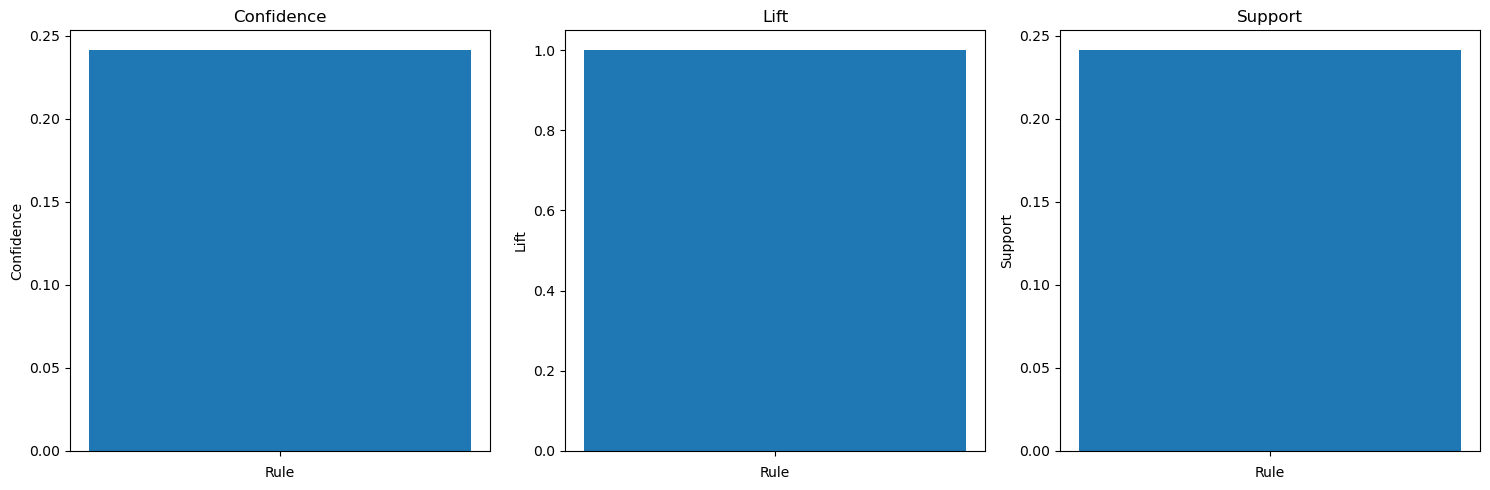

In [41]:
# Plot
import matplotlib.pyplot as plt

# Sort the rules by confidence, lift, and support
result_df_sorted_by_confidence = result_df.sort_values(by='Confidence', ascending=False)
result_df_sorted_by_lift = result_df.sort_values(by='Lift', ascending=False)
result_df_sorted_by_support = result_df.sort_values(by='Support', ascending=False)

# Create subplots for confidence, lift, and support
plt.figure(figsize=(15, 5))

# Plot for Confidence
plt.subplot(131)
plt.bar(result_df_sorted_by_confidence['Left_side'], result_df_sorted_by_confidence['Confidence'])
plt.xticks(rotation=90)
plt.title('Confidence')
plt.xlabel('Rule')
plt.ylabel('Confidence')

# Plot for Lift
plt.subplot(132)
plt.bar(result_df_sorted_by_lift['Left_side'], result_df_sorted_by_lift['Lift'])
plt.xticks(rotation=90)
plt.title('Lift')
plt.xlabel('Rule')
plt.ylabel('Lift')

# Plot for Support
plt.subplot(133)
plt.bar(result_df_sorted_by_support['Left_side'], result_df_sorted_by_support['Support'])
plt.xticks(rotation=90)
plt.title('Support')
plt.xlabel('Rule')
plt.ylabel('Support')

plt.tight_layout()
plt.show()

# In this code, we're creating three subplots for confidence, lift, and support.
#We sort the rules based on these metrics in descending order and then plot the top rules for each metric.


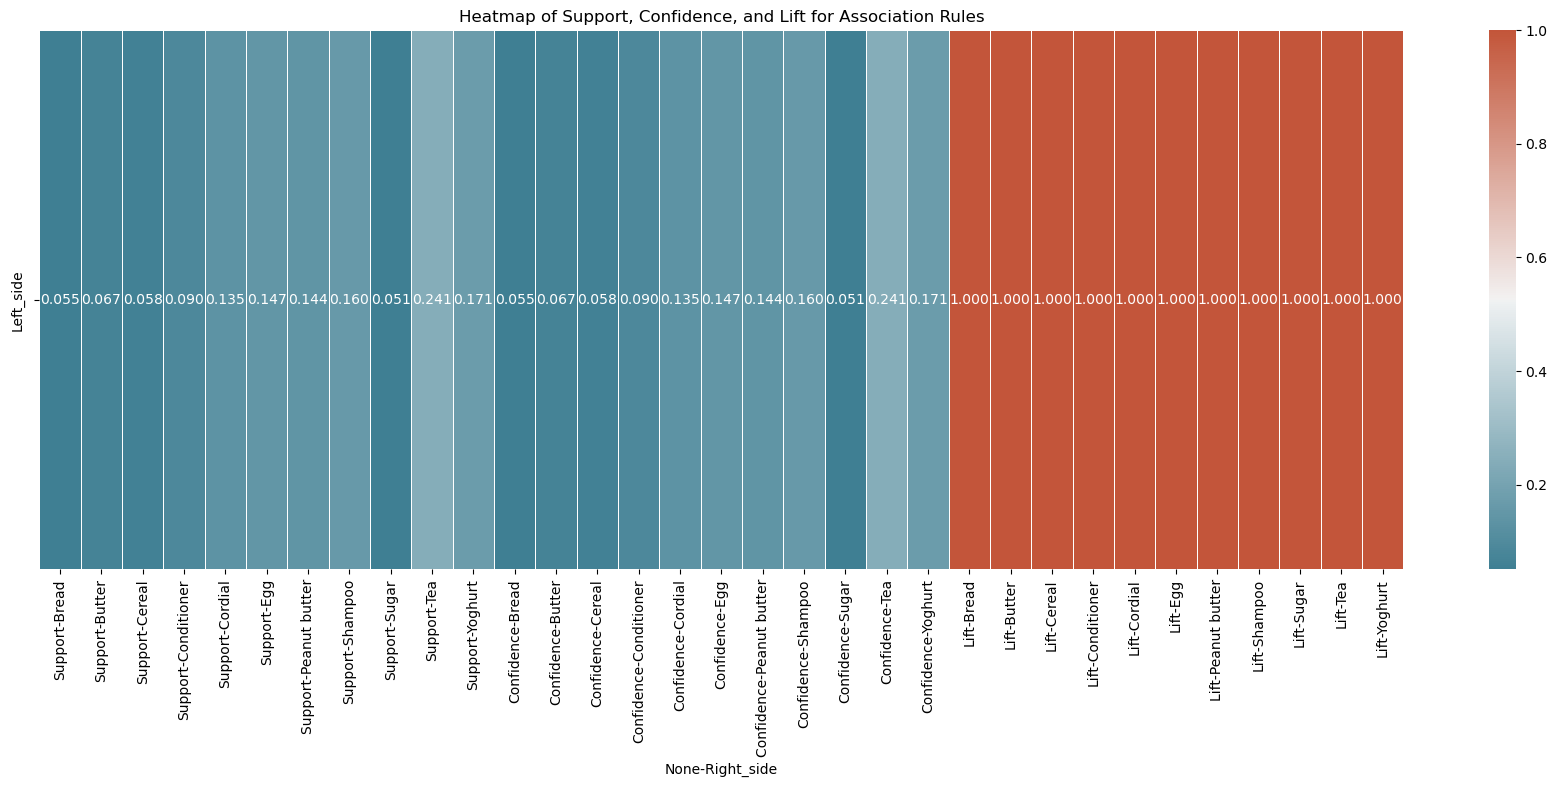

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the DataFrame to have rules as rows and metrics as columns
heatmap_data = result_df.pivot(index='Left_side', columns='Right_side', values=['Support', 'Confidence', 'Lift'])

# Create the heatmap
custom_cmap = sns.diverging_palette(220, 20, as_cmap=True)  # colormap

plt.figure(figsize=(22, 7))
sns.heatmap(heatmap_data, cmap=custom_cmap, annot=True, fmt=".3f", linewidths=.5)


# Customize the heatmap appearance
plt.title('Heatmap of Support, Confidence, and Lift for Association Rules')
plt.show()


**For the heatmap plot**
In the code, I first pivot the DataFrame to arrange the association rules as rows and the metrics (Support, Confidence, Lift) as columns. Then, I create a heatmap using Seaborn. The heatmap colors indicate the values of the metrics, and annotations are added to show the exact values for each rule.

In [58]:
# Task 5
# a) How many rules are in the subset?
# Filter the association rules to include only rules with 'Tea' on the left side
tea_rules = result_df[result_df['Left_side'].str.contains('Tea')]

# Count the number of rules in the subset
num_rules_with_tea = len(tea_rules)
print(f"Number of rules in the subset with 'Tea' on the left side: {num_rules_with_tea}")


# b) Based on the rules, what are the other products these individuals are most likely to purchase?
# Sort the rules within the subset by confidence in descending order
tea_rules_sorted_by_confidence = tea_rules.sort_values(by='Confidence', ascending=False)

# Extract the top rules (products most likely to be purchased with 'Tea')
top_products_with_tea = tea_rules_sorted_by_confidence['Right_side'].values

# Print the top products
print(f"The other products individuals are most likely to purchase with 'Tea':")
for product in top_products_with_tea:
    print(product)


Number of rules in the subset with 'Tea' on the left side: 0
The other products individuals are most likely to purchase with 'Tea':


In [59]:
# Task 6
# Filter the association rules to include only rules with 'Shampoo' on the left side
shampoo_rules = result_df[result_df['Left_side'].str.contains('Shampoo')]

# Sort the rules within the subset by confidence in descending order
shampoo_rules_sorted_by_confidence = shampoo_rules.sort_values(by='Confidence', ascending=False)

# Extract the top right-side products associated with 'Shampoo'
top_products_with_shampoo = shampoo_rules_sorted_by_confidence['Right_side'].values

# Print the products to be placed near 'Shampoo' for increasing sales
print(f"The products to be placed near 'Shampoo' for increasing sales:")
for product in top_products_with_shampoo:
    print(product)


The products to be placed near 'Shampoo' for increasing sales:


# Task 7
The outcome of association rule analysis in a supermarket store can be valuable for decision-makers in various ways. 

1. **Optimizing Shelf Placement**: Supermarket decision-makers can use the association rules to optimize the placement of products on store shelves. For instance, if "Shampoo" and "Conditioner" are frequently purchased together, the store can strategically place these items next to each other on the shelf. This can enhance the shopping experience and increase sales of complementary products.

2. **Targeted Marketing**: The association rules can be used for targeted marketing campaigns. If the analysis reveals that customers who buy "Cereal" are likely to purchase "Milk" as well, the store can run promotions or advertisements that bundle these items together. For example, "Buy Cereal, Get Milk at a Discount." Such promotions can drive sales and customer loyalty.

3. **Inventory Management**: Decision-makers can use the analysis to manage inventory more effectively. If specific products are frequently bought together, the store can ensure that they are well-stocked and placed strategically. This reduces the likelihood of stockouts and enhances customer satisfaction.

4. **Pricing Strategies**: Based on association rules, the store can implement pricing strategies like "Buy One, Get One Half Off" for products that are often purchased together. This incentivizes customers to buy more and increases the average transaction value.

5. **Store Layout and Customer Experience**: The layout of the store can be optimized based on association rules. For example, if "Bread" and "Butter" are frequently purchased together, the store can place them near the entrance to create a pleasant aroma and encourage impulse purchases.

6. **Customer Insights**: The analysis can provide insights into customer preferences and behaviors. Decision-makers can use this information to tailor the product assortment, store layout, and marketing efforts to better serve customer needs.

7. **Seasonal Promotions**: Association rules can help in designing seasonal or thematic promotions. For example, during the summer, if "Ice Cream" and "Cones" are associated, the store can run a summer-themed promotion for these items.

8. **Data-Driven Decision-Making**: The supermarket store can adopt a more data-driven approach to decision-making, focusing on the items that have the highest potential for cross-selling or upselling.

The outcome of association rule analysis can be a powerful tool for decision-makers in a supermarket store. It helps optimize product placement, marketing strategies, inventory management, and the overall customer experience, ultimately leading to increased sales and customer satisfaction.